# Defining the Question

### a) Understanding the context

The business is looking to expand into the aviation industry and needs to identify aircraft with the lowest risk. We will analyze aviation accident data from the National Transportation Safety Board (NTSB) covering civil aviation accidents and selected incidents in the United States and international waters from 1962 to 2023.
The goal is to provide actionable insights and recommendations to the head of the new aviation division to help them make informed decisions about which aircraft to purchase.

### b) Specifying the Objectives

This analysis aims to identify the lowest risk aircraft for the company's new aviation division by answering the following questions:

1.  Identify aircraft categories with the lowest accident rates
2.  Identify aircraft makes with lower risk profiles
3.  Identify aircraft models with lower risk profiles
4.  Identify specific aircraft make and model combinations with lower accident counts in the dataset.

### c) Defining the Metric for Success

Creating visualizations and insights that can successfully inform the head of the new aviation division on which aircraft are the lowest risk to purchase and operate.

### d) Recording the Experimental Design

1. Defining the Question
2. Data Preparation
    * Reading the Data
    * Checking the Data
3. Data Cleaning
4. Feature Engineering
5. Performing EDA
6. Summary and Conclusion
7. Data Relevance
8. Recommendations


# Data Preparation

### Importing our Libraries

In [55]:
# Let us first import all the libraries we will need for our analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# let us set the warnings that may appear in our analysis off

import warnings
warnings.filterwarnings('ignore')

### Loading and Previewing our Datasets

In [56]:
# Loading the Aviation Data from the source i.e. csv
aviation = pd.read_csv('/content/Aviation_Data.csv')
aviation.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Checking the Data

In [57]:
# Determining the no. of records in our dataset
#
print('This dataset has ' + str(aviation.shape[0]) + ' rows, and ' + str(aviation.shape[1]) + ' columns')

This dataset has 90348 rows, and 31 columns


In [58]:
# Checking whether each column has an appropriate datatype
print("Data types for aviation:")
print(aviation.dtypes)

Data types for aviation:
Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight  

In [59]:
# let us see the columns in our dataframe
print("These are the Columns in aviation Dataset:")
print(aviation.columns)

These are the Columns in aviation Dataset:
Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


In [60]:
# let us see the unique values of all our columns
# so that we can separate out the category and numeric features

for col in list(aviation):
    print(col)
    print(aviation[col].unique())

# We are checking the uniques values on these datasets so that we can be able to
# identify which variables can be grouped in order to create visual charts like bar charts and pie charts
# additionally, we want to identify if there are any inconsistencies and typos in the dataset.
# from the output we can see that the year column in the title basics dataset has a typo of 2115 as a year


Event.Id
['20001218X45444' '20001218X45447' '20061025X01555' ... '20221227106497'
 '20221227106498' '20221230106513']
Investigation.Type
['Accident' 'Incident' '25-09-2020' '14-06-2021' '03-11-2020' '24-02-2021'
 '02-02-2021' '05-05-2021' '03-12-2020' '07-12-2020' '06-05-2021'
 '19-11-2020' '04-08-2021' '13-09-2021' '10-06-2021' '14-12-2021'
 '08-06-2021' '24-06-2021' '24-08-2021' '31-03-2021' '27-05-2021'
 '20-05-2021' '18-11-2020' '25-05-2021' '01-06-2021' '15-07-2021'
 '15-10-2021' '26-09-2020' '03-06-2021' '29-09-2021' '28-01-2021'
 '20-10-2021' '11-12-2020' '11-02-2021' '13-12-2021' '06-01-2021'
 '31-08-2021' '04-03-2021' '05-04-2021' '26-01-2021' '29-01-2021'
 '26-08-2021' '08-11-2021' '20-08-2021' '05-01-2021' '22-09-2021'
 '20-09-2021' '16-07-2021' '19-10-2021' '16-11-2021' '17-12-2021'
 '14-06-2022' '22-06-2022' '13-10-2022' '03-11-2022' '13-07-2022'
 '05-07-2022' '01-09-2022' '12-08-2022' '08-09-2022' '22-09-2022'
 '01-11-2022' '01-07-2022' '20-07-2022' '06-10-2022' '23-09-20

# Data Cleaning

### General Cleaning

In [61]:
# let us make a copy of our dataset to clean and do modelling on
# we are making copies to clean and analyse so that we can keep the original raw data unaltered
# in case we need to go back to this original data at any point in our analysis
avi_copy = aviation.copy(deep = True)

In [62]:
# For consistency, let us make the column names uniform
# Let us do this by changing all column names to lower case
#
avi_copy.columns = avi_copy.columns.str.lower()

# Previewing the columns to confirm whether the changes have taken effect
#
# let us see the columns in our dataframe
print("These are the Columns in aviation Dataset:")
print(avi_copy.columns)

These are the Columns in aviation Dataset:
Index(['event.id', 'investigation.type', 'accident.number', 'event.date',
       'location', 'country', 'latitude', 'longitude', 'airport.code',
       'airport.name', 'injury.severity', 'aircraft.damage',
       'aircraft.category', 'registration.number', 'make', 'model',
       'amateur.built', 'number.of.engines', 'engine.type', 'far.description',
       'schedule', 'purpose.of.flight', 'air.carrier', 'total.fatal.injuries',
       'total.serious.injuries', 'total.minor.injuries', 'total.uninjured',
       'weather.condition', 'broad.phase.of.flight', 'report.status',
       'publication.date'],
      dtype='object')


In [63]:
# Let us convert the 'make' column to lowercase for consistency
avi_copy['make'] = avi_copy['make'].str.lower()

# Preview the data to confirm the changes
print("DataFrame after converting 'make' column to lowercase:")
avi_copy.head()

DataFrame after converting 'make' column to lowercase:


,event.id,investigation.type,accident.number,event.date,location,country,latitude,longitude,airport.code,airport.name,...,purpose.of.flight,air.carrier,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured,weather.condition,broad.phase.of.flight,report.status,publication.date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [64]:
# Let us check for any duplicates in our datasets
print(avi_copy.duplicated().sum())

1390


In [65]:
# Drop duplicate rows
avi_copy.drop_duplicates(inplace=True)

#checking if the duplicates have been dropped successfully
print(avi_copy.duplicated().sum())

0


In [66]:
#checking the no. of remaining rows in our dataset after dropping duplicates
print('This dataset has ' + str(avi_copy.shape[0]) + ' rows, and ' + str(avi_copy.shape[1]) + ' columns')

This dataset has 88958 rows, and 31 columns


### Handling Missing Values

In [67]:
# Check for missing values in our dataframe
print("These are the null values in aviation Dataset:")
print(avi_copy.isnull().sum())

These are the null values in aviation Dataset:
event.id                     69
investigation.type            0
accident.number              69
event.date                   69
location                    121
country                     295
latitude                  54576
longitude                 54585
airport.code              38826
airport.name              36254
injury.severity            1069
aircraft.damage            3263
aircraft.category         56671
registration.number        1451
make                        132
model                       161
amateur.built               171
number.of.engines          6153
engine.type                7165
far.description           56935
schedule                  76376
purpose.of.flight          6261
air.carrier               72310
total.fatal.injuries      11470
total.serious.injuries    12579
total.minor.injuries      12002
total.uninjured            5981
weather.condition          4561
broad.phase.of.flight     27234
report.status            

Our dataset has a lot of missing values.
We will need to clean it extensively.
We can start by dropping columns with missing values that will not be crucial in answering our objectives of finding low-risk aircrafts.

In [68]:
# let us identify columns to drop based on relevance to objectives and drop them
# Drop these columns from the DataFrame
avi_copy.drop(['latitude', 'longitude', 'airport.code', 'airport.name', 'far.description', 'publication.date'], axis = 1, inplace=True)

# Check remaining missing values after dropping additional columns
print("Remaining missing values in avi_copy after dropping less relevant columns:")
print(avi_copy.isnull().sum())

Remaining missing values in avi_copy after dropping less relevant columns:
event.id                     69
investigation.type            0
accident.number              69
event.date                   69
location                    121
country                     295
injury.severity            1069
aircraft.damage            3263
aircraft.category         56671
registration.number        1451
make                        132
model                       161
amateur.built               171
number.of.engines          6153
engine.type                7165
schedule                  76376
purpose.of.flight          6261
air.carrier               72310
total.fatal.injuries      11470
total.serious.injuries    12579
total.minor.injuries      12002
total.uninjured            5981
weather.condition          4561
broad.phase.of.flight     27234
report.status              6453
dtype: int64


Let us start by first identifying the percentage of missing values so we can drop columns with over 80% missing values as these would not be useful in our analysis with such a large number of data missing

In [69]:
# Calculate the percentage of missing values in each column on the current
# DataFrame
missing_percent = (avi_copy.isnull().sum() / len(avi_copy)) * 100

# Display columns with missing values and their percentages
print("Percentage of missing values per column:")
print(missing_percent.sort_values(ascending=False))

Percentage of missing values per column:
schedule                  85.856247
air.carrier               81.285550
aircraft.category         63.705344
broad.phase.of.flight     30.614447
total.serious.injuries    14.140381
total.minor.injuries      13.491760
total.fatal.injuries      12.893725
engine.type                8.054363
report.status              7.253985
purpose.of.flight          7.038153
number.of.engines          6.916747
total.uninjured            6.723398
weather.condition          5.127139
aircraft.damage            3.668023
registration.number        1.631107
injury.severity            1.201691
country                    0.331617
amateur.built              0.192226
model                      0.180984
make                       0.148385
location                   0.136019
accident.number            0.077565
event.date                 0.077565
event.id                   0.077565
investigation.type         0.000000
dtype: float64


In [70]:
# Identify columns with more than 80% missing values
# if more than 80% data in a column is missing
# this column will most definitely not be useful in our anlysis

columns_to_keep = missing_percent[missing_percent <= 80].index.tolist()

# Create a new DataFrame with only the columns to keep
avi_copy = avi_copy[columns_to_keep]

# Verify that the columns have been dropped
print("Columns remaining in the DataFrame after dropping columns with Over 80% missing values:")
print(avi_copy.columns)

Columns remaining in the DataFrame after dropping columns with Over 80% missing values:
Index(['event.id', 'investigation.type', 'accident.number', 'event.date',
       'location', 'country', 'injury.severity', 'aircraft.damage',
       'aircraft.category', 'registration.number', 'make', 'model',
       'amateur.built', 'number.of.engines', 'engine.type',
       'purpose.of.flight', 'total.fatal.injuries', 'total.serious.injuries',
       'total.minor.injuries', 'total.uninjured', 'weather.condition',
       'broad.phase.of.flight', 'report.status'],
      dtype='object')


In [71]:
# Check for remaining missing values
print("Remaining missing values in avi_copy after dropping columns with > 80% missing values:")
print(avi_copy.isnull().sum())

Remaining missing values in avi_copy after dropping columns with > 80% missing values:
event.id                     69
investigation.type            0
accident.number              69
event.date                   69
location                    121
country                     295
injury.severity            1069
aircraft.damage            3263
aircraft.category         56671
registration.number        1451
make                        132
model                       161
amateur.built               171
number.of.engines          6153
engine.type                7165
purpose.of.flight          6261
total.fatal.injuries      11470
total.serious.injuries    12579
total.minor.injuries      12002
total.uninjured            5981
weather.condition          4561
broad.phase.of.flight     27234
report.status              6453
dtype: int64


Let us now deal with the remaining missing values.

In [72]:
# Print the sum of null values for each column that still has missing values
missing = avi_copy.isnull().sum()

#and filter to show only columns with at least one missing value
print(missing[missing > 0])

event.id                     69
accident.number              69
event.date                   69
location                    121
country                     295
injury.severity            1069
aircraft.damage            3263
aircraft.category         56671
registration.number        1451
make                        132
model                       161
amateur.built               171
number.of.engines          6153
engine.type                7165
purpose.of.flight          6261
total.fatal.injuries      11470
total.serious.injuries    12579
total.minor.injuries      12002
total.uninjured            5981
weather.condition          4561
broad.phase.of.flight     27234
report.status              6453
dtype: int64


In [73]:
# Impute missing values in injury-related columns with 0
# We are making an assumption that a missing value in these columns most likely
# indicated that there were zero injuries and that these fields might be left
# blank in the original data collection

injury_cols = ['total.fatal.injuries', 'total.serious.injuries', 'total.minor.injuries', 'total.uninjured']
avi_copy[injury_cols] = avi_copy[injury_cols].fillna(0)

# Check remaining missing values after imputing injury columns
print("Remaining missing values after imputing injury columns:")

missing = avi_copy.isnull().sum()
print(missing[missing > 0])

Remaining missing values after imputing injury columns:
event.id                    69
accident.number             69
event.date                  69
location                   121
country                    295
injury.severity           1069
aircraft.damage           3263
aircraft.category        56671
registration.number       1451
make                       132
model                      161
amateur.built              171
number.of.engines         6153
engine.type               7165
purpose.of.flight         6261
weather.condition         4561
broad.phase.of.flight    27234
report.status             6453
dtype: int64


Let us analyse the remaining missing values:

*  event.id, accident.number, event.date: These are unique identifiers and specific dates for each event. Missing values in these columns might indicate incomplete records. Since these are unique identifiers and dates, imputing them wouldn't be meaningful or accurate. Therefore the only logical option is to drop them.
*  location and country: The location and country of the accident are also unique for each accident. Imputing location is difficult and likely inaccurate without additional information. Given the size our dataset and the fact that these columns have less than 1% of missing data, the most logical course of action is to drop these missing rows.
*  registration.number: The aircraft's registration number is a unique identifier and cannot be imputed. Rows with missing registration numbers need to be excluded from analyses requiring this information.
*   make, model: Imputing make and model is not feasible without external data or complex methods. Missing values here will limit analysis by aircraft type.Given the size our dataset and the fact that these columns have less than 1% of missing data, the most logical course of action is to drop these missing rows.
* injury.severity: Although we imputed the counts of injuries with 0, the severity itself in some rows is missing. Imputing this could introduce bias.For this reason, we will drop these rows.


In [74]:
# Drop rows with missing values in 'event.id', 'accident.number',
# 'event.date', 'location','country','registration.number','make','model',
# injury.severity
avi_copy.dropna(subset=['event.id', 'accident.number', 'event.date','location','country','registration.number','make','model','injury.severity'], inplace=True)

# Let us check remaining missing values after dropping rows
print("Remaining missing values after dropping rows with missing unique identifiers:")
missing = avi_copy.isnull().sum()
print(missing[missing > 0])

Remaining missing values after dropping rows with missing unique identifiers:
aircraft.damage           2499
aircraft.category        55146
amateur.built               31
number.of.engines         4135
engine.type               5366
purpose.of.flight         4673
weather.condition         3179
broad.phase.of.flight    24859
report.status             5441
dtype: int64


In [75]:
# Let us also clean the 'make' column by converting all the contents to lowercase
# this will make sure that similar makes that were different cases are now the same
avi_copy['make'] = avi_copy['make'].str.lower()

In [76]:
#checking the no. of remaining rows in our dataset after dropping duplicates
print('This dataset has ' + str(avi_copy.shape[0]) + ' rows, and ' + str(avi_copy.shape[1]) + ' columns')

This dataset has 86216 rows, and 23 columns


We have not lost a large part of our data, we can continue with the cleaning process

In [77]:
# since there are row values with 'unknown' in the purpose.of.flight column we
# know these from the output of our unique values of all columns while checking
# the data let us impute the missing rows with that

avi_copy['purpose.of.flight'].fillna('Unknown', inplace=True)

# Check remaining missing values after imputing purpose.of.flight
print("Remaining missing values after imputing purpose.of.flight:")
missing = avi_copy.isnull().sum()
print(missing[missing > 0])

Remaining missing values after imputing purpose.of.flight:
aircraft.damage           2499
aircraft.category        55146
amateur.built               31
number.of.engines         4135
engine.type               5366
weather.condition         3179
broad.phase.of.flight    24859
report.status             5441
dtype: int64


In [78]:
# let us check the distribution of 'amateur.built' and 'aircraft.damage' to see
# how best to handle the missing values
print(avi_copy['amateur.built'].value_counts())

amateur.built
No     77837
Yes     8348
Name: count, dtype: int64


In [79]:
#since most aircrafts are not amateur built
#let us fill the missing values with 'No'
avi_copy['amateur.built'].fillna('No', inplace=True)

# Check remaining missing values after imputing amateur.built
print("Remaining missing values after imputing amateur.built:")
missing = avi_copy.isnull().sum()
print(missing[missing > 0])

Remaining missing values after imputing amateur.built:
aircraft.damage           2499
aircraft.category        55146
number.of.engines         4135
engine.type               5366
weather.condition         3179
broad.phase.of.flight    24859
report.status             5441
dtype: int64


In [80]:
# let us check the distribution of 'aircraft.damage' to see
# how best to handle the missing values
print(avi_copy['aircraft.damage'].value_counts())

aircraft.damage
Substantial    63394
Destroyed      17788
Minor           2443
Unknown           92
Name: count, dtype: int64


In [81]:
# since we can not know the damage to an aircraft without more information
#  let us impute the 'aircraft,damage' column with this value

avi_copy['aircraft.damage'].fillna('Unknown', inplace=True)

# Check remaining missing values after imputing 'aircraft,damage''
print("Remaining missing values after imputing 'aircraft,damage':")
missing = avi_copy.isnull().sum()
print(missing[missing > 0])

Remaining missing values after imputing 'aircraft,damage':
aircraft.category        55146
number.of.engines         4135
engine.type               5366
weather.condition         3179
broad.phase.of.flight    24859
report.status             5441
dtype: int64


In [82]:
# let us check the distribution of 'weather,condition' to see how best to handle the
# missing values
print(avi_copy['weather.condition'].value_counts())

weather.condition
VMC    76331
IMC     5788
UNK      681
Unk      237
Name: count, dtype: int64


From the NTSB website, there are 3 categories of weather conditions, IMC, VMC and None.
Assuming that 'UNK' and 'Unk' both refer to 'Unknown' category, let us impute the missing values with 'UNK', let us also change 'Unk' to 'UNK' for uniformity purposes.

In [83]:
# Let us replace 'Unk' with 'UNK' in 'weather.condition'
avi_copy['weather.condition'] = avi_copy['weather.condition'].replace('Unk', 'UNK')

# let us then immpute missing values in 'weather.condition' with 'UNK'
avi_copy['weather.condition'].fillna('UNK', inplace=True)

# Let us check the value counts after imputation to make sure the changes were
# successful
print("Value counts for weather.condition after imputation:")
print(avi_copy['weather.condition'].value_counts())


Value counts for weather.condition after imputation:
weather.condition
VMC    76331
IMC     5788
UNK     4097
Name: count, dtype: int64


In [84]:
# Check remaining missing values
print("\nRemaining missing values after imputing weather.condition:")
missing = avi_copy.isnull().sum()
print(missing[missing > 0])


Remaining missing values after imputing weather.condition:
aircraft.category        55146
number.of.engines         4135
engine.type               5366
broad.phase.of.flight    24859
report.status             5441
dtype: int64


In [85]:
# Check remaining missing values after imputing 'aircraft.category' by make and Model
print("Remaining missing values after imputing 'aircraft.category' by make and Model:")
missing = avi_copy.isnull().sum()
print(missing[missing > 0])

Remaining missing values after imputing 'aircraft.category' by make and Model:
aircraft.category        55146
number.of.engines         4135
engine.type               5366
broad.phase.of.flight    24859
report.status             5441
dtype: int64


In [86]:
# let us check the distribution of 'engine.type' to see how best to handle the
# missing values
print("Value counts for engine.type:")
print(avi_copy['engine.type'].value_counts())

Value counts for engine.type:
engine.type
Reciprocating      69266
Turbo Shaft         3506
Turbo Prop          3354
Turbo Fan           2320
Unknown             1698
Turbo Jet            691
Electric               8
LR                     2
NONE                   2
Hybrid Rocket          1
Geared Turbofan        1
UNK                    1
Name: count, dtype: int64


In [87]:
# Impute missing values in 'engine.type' with 'Unknown'
# Based on the value counts, 'Reciprocating' is the most frequent engine type.
# However, 'Unknown' is also a valid category. Let's impute with 'Unknown'
# Also, assuming 'UNK' means Unknown, let's replace it with 'Unknown'
avi_copy['engine.type'] = avi_copy['engine.type'].replace('UNK', 'Unknown')
avi_copy['engine.type'].fillna('Unknown', inplace=True)

# Check remaining missing values after imputing engine.type
print("Remaining missing values after imputing engine.type:")
missing = avi_copy.isnull().sum()
print(missing[missing > 0])

Remaining missing values after imputing engine.type:
aircraft.category        55146
number.of.engines         4135
broad.phase.of.flight    24859
report.status             5441
dtype: int64


In [88]:
# let us check the distribution of 'broad.phase.of.flight' to see how best to handle the
# missing values
print("Value counts for broad.phase.of.flight:")
print(avi_copy['broad.phase.of.flight'].value_counts())

Value counts for broad.phase.of.flight:
broad.phase.of.flight
Landing        15370
Takeoff        12407
Cruise         10201
Maneuvering     8094
Approach        6511
Climb           2018
Taxi            1942
Descent         1874
Go-around       1351
Standing         934
Unknown          536
Other            119
Name: count, dtype: int64


In [89]:
# Impute missing values in 'broad.phase.of.flight' with 'Unknown'
# Based on the value counts, 'Landing' is the most frequent phase.
# However, 'Unknown' is also present. Let's impute with 'Unknown'
avi_copy['broad.phase.of.flight'].fillna('Unknown', inplace=True)

# Check remaining missing values after imputing broad.phase.of.flight
print("Remaining missing values after imputing broad.phase.of.flight:")
missing = avi_copy.isnull().sum()
print(missing[missing > 0])

Remaining missing values after imputing broad.phase.of.flight:
aircraft.category    55146
number.of.engines     4135
report.status         5441
dtype: int64


In [90]:
# Impute missing values in 'report.status' with the mode
# Let's find the mode of 'report.status'
report_status_mode = avi_copy['report.status'].mode()[0]

# Print the mode of 'report.status'
print(report_status_mode)

avi_copy['report.status'].fillna(report_status_mode, inplace=True)

# Check remaining missing values after imputing report.status
print("\nRemaining missing values after imputing report.status:")
missing = avi_copy.isnull().sum()
print(missing[missing > 0])

Probable Cause

Remaining missing values after imputing report.status:
aircraft.category    55146
number.of.engines     4135
dtype: int64


Looking at the data, the best way to fill the missing values in the **number.of.engines** column is based on Aircraft Make

To do this, we will group the data by aircraft **make** and calculate the mode (most frequent number of engines) for each make. Then, we will use these make-specific modes to fill in the missing **number.of.engines** values.

In [91]:
# Calculate the mode of 'number.of.engines' for each 'make'
engines_mode_by_make = avi_copy.groupby('make')['number.of.engines'].transform(lambda x: x.mode()[0] if not x.mode().empty else None)

# Impute missing values in 'number.of.engines' with the calculated modes by make
avi_copy['number.of.engines'].fillna(engines_mode_by_make, inplace=True)

# If there are still missing values (for makes not present in the grouped data),
# fill them with the overall mode of 'number.of.engines'
overall_engines_mode = avi_copy['number.of.engines'].mode()[0]
avi_copy['number.of.engines'].fillna(overall_engines_mode, inplace=True)

# Check remaining missing values after imputing number.of.engines by make
print("Remaining missing values after imputing number.of.engines by make:")
missing = avi_copy.isnull().sum()
print(missing[missing > 0])

Remaining missing values after imputing number.of.engines by make:
aircraft.category    55146
dtype: int64


Let us use the same technique as above to fill the aircraft category column as well

In [92]:
# Attempt to impute 'aircraft.category' based on the mode of 'aircraft.category' for each 'make'
category_mode_by_make = avi_copy.groupby('make')['aircraft.category'].transform(lambda x: x.mode()[0] if not x.mode().empty else None)
avi_copy['aircraft.category'] = avi_copy['aircraft.category'].fillna(category_mode_by_make)

# Finally, fill any remaining missing values with 'Unknown'
# This will fill values that couldn't be imputed by make (e.g., make had no known category)
avi_copy['aircraft.category'].fillna('Unknown', inplace=True)

# Check remaining missing values in aircraft.category
print("\nMissing values in 'aircraft.category' after imputation by make and filling remaining with 'Unknown':")
print(avi_copy['aircraft.category'].isnull().sum())


Missing values in 'aircraft.category' after imputation by make and filling remaining with 'Unknown':
0


In [93]:
# Final check for any remaining missing values
print("Final check for missing values:")
print(avi_copy.isnull().sum())

Final check for missing values:
event.id                  0
investigation.type        0
accident.number           0
event.date                0
location                  0
country                   0
injury.severity           0
aircraft.damage           0
aircraft.category         0
registration.number       0
make                      0
model                     0
amateur.built             0
number.of.engines         0
engine.type               0
purpose.of.flight         0
total.fatal.injuries      0
total.serious.injuries    0
total.minor.injuries      0
total.uninjured           0
weather.condition         0
broad.phase.of.flight     0
report.status             0
dtype: int64


# Feature Engineering

In [94]:
# Let us make a copy of the clean data to do analysis on
clean_data = avi_copy.copy(deep = True)

In [95]:
# Let us create a new feature called make model
# where we ombine 'make' and 'model' into a new column
# Using a hyphen as a separator, and handling potential missing values in make or model
clean_data['make_model'] = avi_copy['make'].astype(str) + '-' + avi_copy['model'].astype(str)

# Display the first few rows to show the new column
print("DataFrame with the new 'make_model' column:")
display(clean_data[['make', 'model', 'make_model']].head())

DataFrame with the new 'make_model' column:


,make,model,make_model
0,stinson,108-3,stinson-108-3
1,piper,PA24-180,piper-PA24-180
2,cessna,172M,cessna-172M
3,rockwell,112,rockwell-112
4,cessna,501,cessna-501


In [96]:
# let us create a total injury column
clean_data['total.injury'] = clean_data['total.fatal.injuries'] + clean_data['total.serious.injuries'] + clean_data['total.minor.injuries'] + clean_data['total.uninjured']

# Display the first few rows to show the new column
print("DataFrame with the new 'total.injury' column:")
display(clean_data[['total.fatal.injuries', 'total.serious.injuries', 'total.minor.injuries', 'total.uninjured', 'total.injury']].head())

DataFrame with the new 'total.injury' column:


,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured,total.injury
0,2.0,0.0,0.0,0.0,2.0
1,4.0,0.0,0.0,0.0,4.0
2,3.0,0.0,0.0,0.0,3.0
3,2.0,0.0,0.0,0.0,2.0
4,1.0,2.0,0.0,0.0,3.0


# Export Data

Our Data is now clean and feature engineered, let us export the clean data for analysis in Tableau and let us move on to answering our objectives with the clean data.

In [97]:
# Export the cleaned DataFrame to a CSV file
clean_data.to_csv('cleaned_aviation_data.csv', index=False)

print("Cleaned data exported to 'cleaned_aviation_data.csv'")

Cleaned data exported to 'cleaned_aviation_data.csv'


# Exploratory Data Analysis to Answer our Ojectives


### Identify aircraft categories with the lowest accident rates

In [98]:
# Group by 'aircraft.category' and then count the number of accidents in those categories
accident_counts_by_category = clean_data['aircraft.category'].value_counts().reset_index().sort_values(by='count', ascending=True)

# Let us set desired names for the columns in the df we have created in the previous line to columns
accident_counts_by_category.columns = ['aircraft.category', 'accident_count']

# Display the accident counts per aircraft category
print("Accident counts by aircraft category:")
display(accident_counts_by_category)

#display() makes the output of DataFrames look much better and more readable

Accident counts by aircraft category:


,aircraft.category,accident_count
13,ULTR,1
12,Rocket,2
10,Powered-Lift,4
11,Blimp,4
9,WSFT,9
8,Ultralight,42
7,Powered Parachute,92
6,Weight-Shift,169
5,Gyrocraft,241
4,Balloon,678


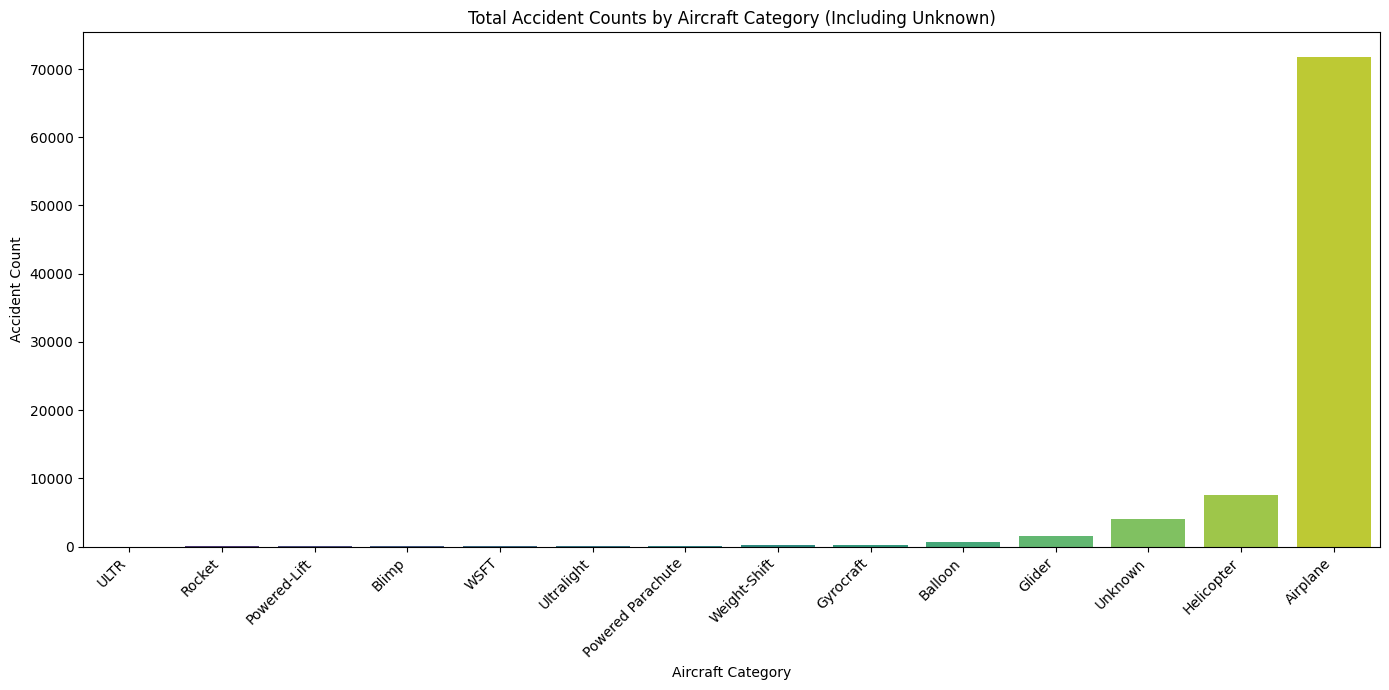

In [99]:
# now let us visualize the above information using a bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x='aircraft.category', y='accident_count', data=accident_counts_by_category, palette='viridis')
plt.title('Total Accident Counts by Aircraft Category (Including Unknown)')
plt.xlabel('Aircraft Category')
plt.ylabel('Accident Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Identify aircraft makes and models with lower risk profiles

#### Make

In [100]:
# Analyze accident counts by aircraft make using the cleaned data
accident_counts_by_make = avi_copy['make'].value_counts().reset_index().sort_values(by='count', ascending=True)

# Let us set desired names for the columns in the df we have created in the previous line to columns
accident_counts_by_make.columns = ['make', 'accident_count']

# Display lowest accident counts by make
print("Aircraft makes with the Lowest accident count:")
display(accident_counts_by_make.head(20))

Aircraft makes with the Lowest accident count:


,make,accident_count
4979,hooper james a,1
4993,crisman,1
4992,corvus,1
4991,tolbert robert r,1
4990,forster,1
4989,wsk-pzl meilec,1
4988,brown thomas e,1
4987,from here to there pdq inc,1
4986,grahn j/grahn g,1
4985,pongracz john m,1


In [101]:
# Display highest accident counts by make
print("Aircraft makes with the Higest accident count:")
display(accident_counts_by_make.tail(20))

Aircraft makes with the Higest accident count:


,make,accident_count
19,de havilland,405
18,luscombe,414
17,aero commander,417
16,stinson,439
15,champion,519
14,mcdonnell douglas,534
13,maule,589
12,aeronca,635
11,air tractor,683
10,schweizer,760


Let us visualize the highest accident prone MAkes

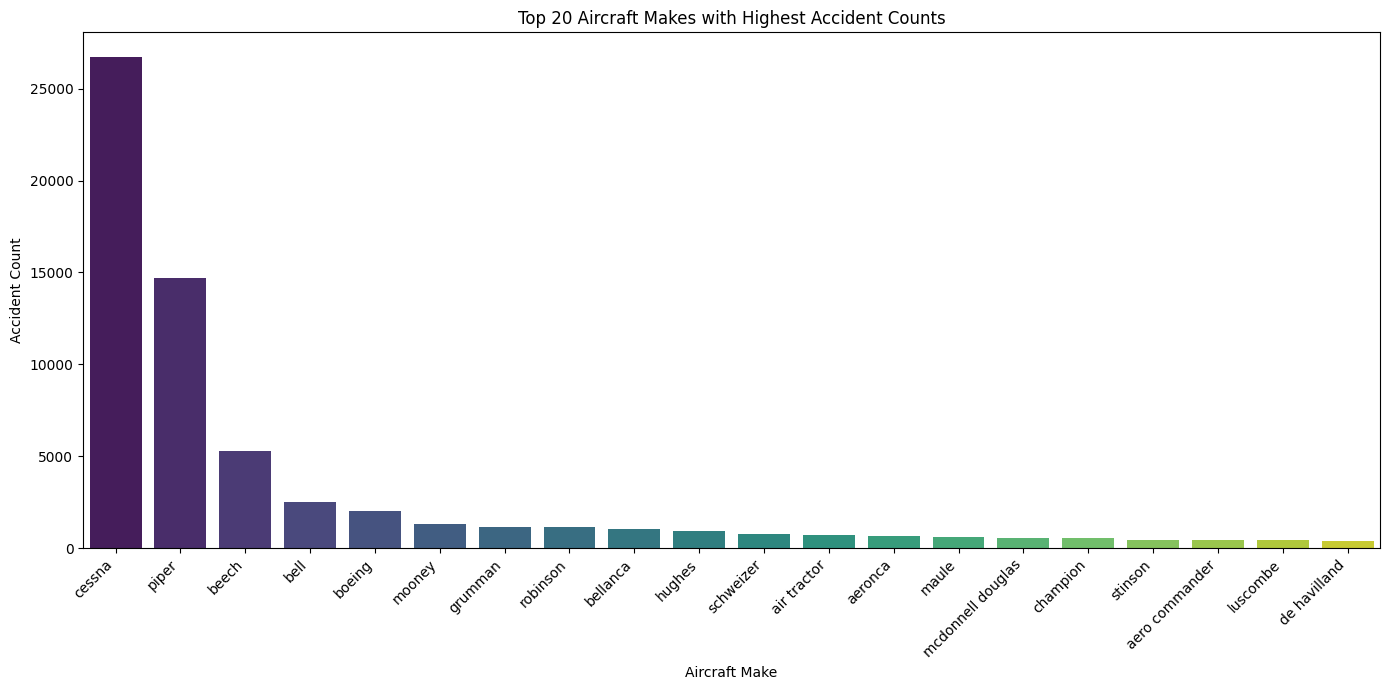

In [102]:
# Get the top 20 makes with the highest accident counts
highest_accident_makes = accident_counts_by_make.sort_values(by='accident_count', ascending=False).head(20)

# Create a vertical bar chart for the makes with the highest accident counts
plt.figure(figsize=(14, 7))
sns.barplot(x='make', y='accident_count', data=highest_accident_makes, palette='viridis')
plt.title('Top 20 Aircraft Makes with Highest Accident Counts')
plt.xlabel('Aircraft Make')
plt.ylabel('Accident Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the above bar chart, we can see that aircrafts like Cessna and Piper have the highest count of reported accidents which could be attributed to their widespread use as they are popular and large aircraft manufacturerd in the aviation industry.

Other well known and large manufacturers of aircrafts with high accident rates are Bell, Boeing and Beech.

However, compared to Cessna and Piper,  Bell, Boeing and Beech have significantly lower accident rate over the same period of time

#### Model

In [103]:
# Analyze accident counts by aircraft model using the cleaned data

accident_counts_by_model = avi_copy['model'].value_counts().reset_index().sort_values(by='count', ascending=True)

# Let us set desired names for the columns in the df we have created in the previous line to columns
accident_counts_by_model.columns = ['model', 'accident_count']

# Display lowest accident counts by make
print("Aircraft Model with the Lowest accident count:")
display(accident_counts_by_model.head(20))

Aircraft Model with the Lowest accident count:


,model,accident_count
5989,STARDUSTER SA 100,1
5997,F150L,1
5996,767 328,1
5995,VARI EZ,1
5994,AVID SW 65,1
5993,YAK 52W,1
5992,GP 4,1
5991,VANS ACFT RV8,1
5990,SEAMAX-M22,1
5998,SONEX TRAINER,1


In [104]:
# Display lowest accident counts by make
print("Aircraft Model with the Highest accident count:")
display(accident_counts_by_model.tail(20))

Aircraft Model with the Highest accident count:


,model,accident_count
19,A36,445
18,150L,456
17,G-164A,460
16,PA-38-112,463
15,206B,494
14,PA-28-181,522
13,PA-28-161,565
12,PA-28-180,571
11,PA-18-150,578
10,PA-18,581


Let us visualize the highest accident prone Models

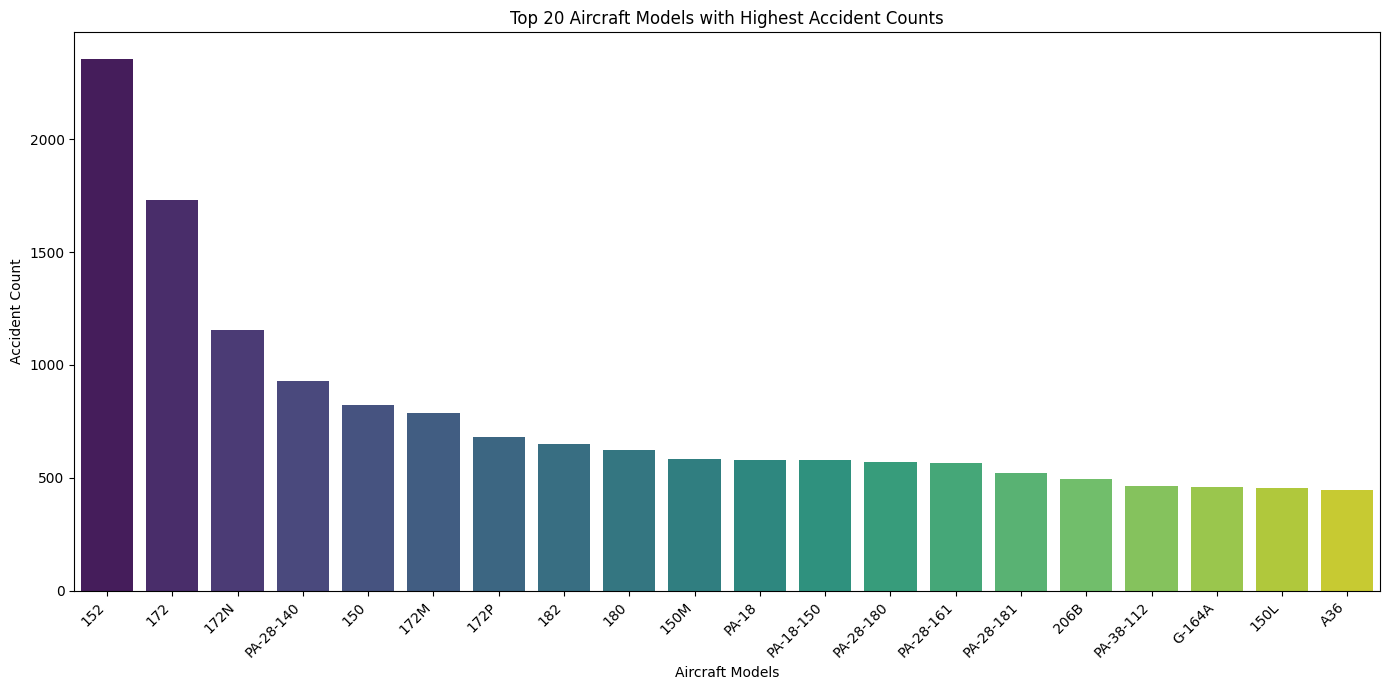

In [105]:
# Get the top 20 makes with the highest accident counts
highest_accident_model = accident_counts_by_model.sort_values(by='accident_count', ascending=False).head(20)

# Create a bar chart for the makes with the highest accident counts
plt.figure(figsize=(14, 7))
sns.barplot(x='model', y='accident_count', data=highest_accident_model, palette='viridis')
plt.title('Top 20 Aircraft Models with Highest Accident Counts')
plt.xlabel('Aircraft Models')
plt.ylabel('Accident Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Make and Model

In [106]:
# Analyze accident counts by aircraft model using the cleaned data

accident_counts_by_make_model = clean_data['make_model'].value_counts().reset_index().sort_values(by='count', ascending=True)

# Let us set desired names for the columns in the df we have created in the previous line to columns
accident_counts_by_make_model.columns = ['make_model', 'accident_count']

# Display lowest accident counts by make
print("Aircraft Make and Model with the Lowest accident count:")
display(accident_counts_by_make_model.head(20))

Aircraft Make and Model with the Lowest accident count:


,make_model,accident_count
11967,taylor titch-MK III,1
11975,massegee-REBEL 300,1
11974,parrigin-RV-4,1
11973,dooley-MUSTANG MII,1
11972,comben-BOWERS FLYBABY IA,1
11971,"rotec engineering, inc.-RALLEY III",1
11970,monnett-SONERIA,1
11969,mbb-BO 105CB4,1
11968,robert bressler-PITTS S-1E,1
11976,schleicher-ASW-12,1


In [107]:
# Display highest accident counts by make
print("Aircraft Make and Model with the Highest accident count:")
display(accident_counts_by_make_model.tail(20))

Aircraft Make and Model with the Highest accident count:


,make_model,accident_count
19,cessna-140,401
18,beech-A36,414
17,cessna-150L,455
16,piper-PA-38-112,462
15,bell-206B,486
14,piper-PA-28-181,520
13,piper-PA-28-161,561
12,piper-PA-18-150,571
11,piper-PA-28-180,571
10,piper-PA-18,578


Let us visualize the highest accident prone Makes+Models

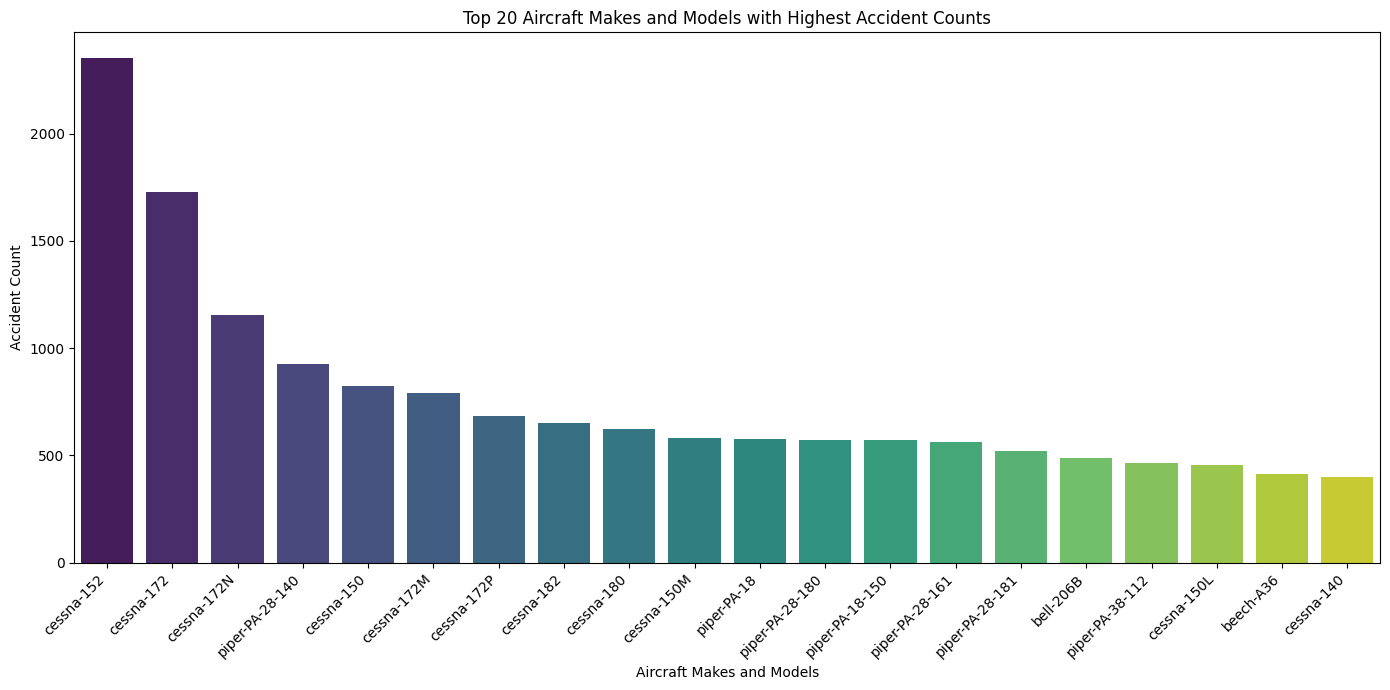

In [108]:
# Get the top 20 makes and models with the highest accident counts
highest_accident_make_model = accident_counts_by_make_model.sort_values(by='accident_count', ascending=False).head(20)

# Create a bar chart for the makes with the highest accident counts
plt.figure(figsize=(14, 7))
sns.barplot(x='make_model', y='accident_count', data=highest_accident_make_model, palette='viridis')
plt.title('Top 20 Aircraft Makes and Models with Highest Accident Counts')
plt.xlabel('Aircraft Makes and Models')
plt.ylabel('Accident Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We will perform the rest of the analysis on Tableau provide Summary of the findings in the next section

# Summary and Conclusion

Based purely on the accident counts in this dataset, the aircraft categories with the lowest recorded incidents are:

*   ULTR
*   Rocket
*   Powered-Lift
*   Blimp
*   WSFT
*   Ultralight
*   Powered Parachute
*   Weight-Shift
*   Gyrocraft
*   Balloon

For this reason, we would advise the company to look at these aircraft categoies first as an investment option.

However, it's important to note that while these categories have the fewest accidents in this dataset, this does not definitively mean they are the "lowest risk" without considering operational data such as the number of aircraft in service or total flight hours for each category. However, within the scope of this dataset, they show the least frequent involvement in reported accidents.

From the EDA of make and Model, we can draw the following findings:

* We can see that aircrafts like Cessna and Piper have the highest count of reported accidents which could be attributed to their widespread use as they are popular and large aircraft manufacturerd in the aviation industry.

* Other well known and large manufacturers of aircrafts with high accident rates are Bell, Boeing and Beech.
However, compared to Cessna and Piper,  Bell, Boeing and Beech have significantly lower accident rate over the same period of time.

* Make and Model: The combined make and model analysis reinforces the findings from the individual make and model analyses. Cessna and Piper models dominate the list of combinations with the highest accident counts.

All the makes with the least number of recorded accident in the dataset are comprised of a variety of names which mostly appear to be from less known aircraft manufacturers.

Although these makes have the least reported number of accidents, it may not be indicative of their overall safety, it may merely suggest that these are highly specialized aircrafts built by individuals and not many of them are operational, thereby leading to low reported cases of accidents.

# Data Relevance

The data had Aircraft categories, makes, and models and their recorded accident count over a significantly long period of time which assisted us in answering our set objectives. However, a crucial limitation of this analysis is the lack of operational data (e.g., total flight hours, number of aircraft in operation) for each category, make, and model. Without this context, we cannot calculate accident *rates* (accidents per flight hour or per aircraft), which are a more accurate measure of risk.
Therefore, while we can identify aircraft with low accident *counts* in this dataset, we cannot definitively conclude they have the lowest *risk profiles* without further information.

Based on this, we highly recommended seeking of  additional data on operational exposure and potentially consult with aviation safety experts for a more comprehensive risk assessment before making purchasing decisions.

# Recommendations
1. Prioritize low-risk aicraft categories.
* Based on accident counts and fatality rates, aircraft such as ultralights, gliders, balloons, and powered parachutes show the lowest recorded accident frequency. These categories are safer entry points for new aviation ventures.
2. Focus on pilot training.
* A significant number of accidents occur during Takeoff and landing phases. Investing in advanced pilot training can greatly reduce risk.

3. Assess flight purpose risks
* Identify purpose of flight with high-risk — such as personal or instructional operations — to focus safety initiatives and training where they’ll have the greatest impact. In this case since most aircaraft accidents are linked to flying for personal purposes, pilots flying for this purpose could be trained on better decision-making and situational awareness as well as additional training on handling emergency situations.

4. Obtain exposure data.
* This will provide more operational data that would be useful in the analysis and give a clearer understanding of accident rates and hence more accurate risk comparisons.
  